<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [19]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [20]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [21]:
missing_values = df.isnull().sum().reset_index()
headers = ['Column','count']
missing_values.columns = headers
missing_values.sort_values(by='count', ascending=False, inplace=False).reset_index(drop=True)

,Column,count
0,AINextMuch less integrated,64289
1,AINextLess integrated,63082
2,AINextNo change,52939
3,AINextMuch more integrated,51999
4,EmbeddedAdmired,48704
...,...,...
109,MainBranch,0
110,Age,0
111,Employment,0
112,Check,0


In [35]:
missing_values = df.isnull().sum().reset_index()
headers = ['column','count']
missing_values.columns = headers
missing_values.sort_values(by='count', ascending=False, inplace=False).reset_index(drop=True)



,column,count
0,AINextMuch less integrated,27858
1,AINextLess integrated,27336
2,AINextNo change,22121
3,AINextMuch more integrated,21730
4,EmbeddedAdmired,20551
...,...,...
110,NEWSOSites,0
111,TBranch,0
112,AISelect,0
113,JobSat,0


In [37]:
df = df.dropna(subset=['Employment','JobSat','RemoteWork','YearsCodePro'])



In [38]:
df[['Employment','JobSat','RemoteWork','YearsCodePro']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 28347 entries, 12 to 65412
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Employment    28347 non-null  object 
 1   JobSat        28347 non-null  float64
 2   RemoteWork    28347 non-null  object 
 3   YearsCodePro  28347 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ MB


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [39]:
df['YearsCodePro'].value_counts()

YearsCodePro
3     2261
2     2151
5     2016
10    1918
4     1866
6     1725
8     1588
7     1533
1     1173
12    1111
9      973
15     935
20     818
11     806
0      779
13     703
14     628
16     577
18     526
25     504
17     481
24     343
30     318
19     312
22     275
23     258
26     243
21     216
27     212
28     170
35     122
29     100
32     100
40      90
33      72
34      72
36      64
31      55
38      53
37      44
45      30
39      29
42      23
41      22
43      16
44      12
51       8
46       5
49       4
48       3
50       2
47       2
Name: count, dtype: int64

In [40]:
df['JobSat'].value_counts()

JobSat
8.0     7322
7.0     6240
6.0     3651
9.0     3555
10.0    2195
5.0     1869
3.0     1141
4.0     1097
2.0      736
0.0      284
1.0      257
Name: count, dtype: int64

  ExperienceRange  JobSat
0             0-5     7.0
1           11-20     8.0
2            6-10     7.0
3             >20     8.0


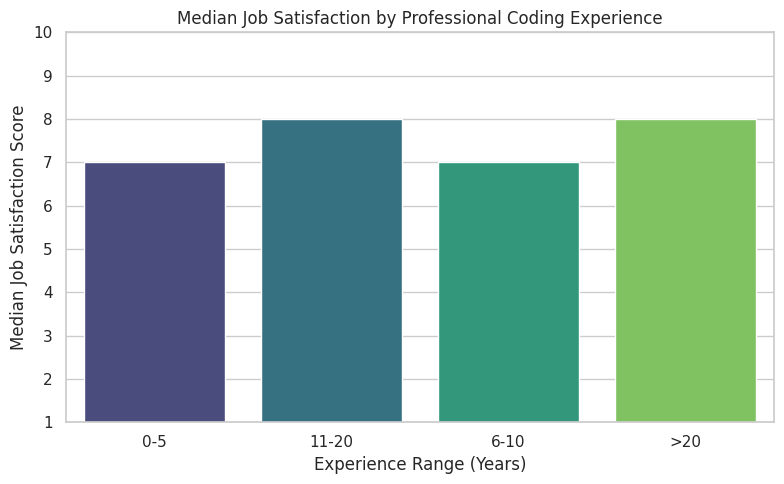

In [41]:
## Write your code here
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': '0',
    'More than 50 years': '51'
})
df['YearsCodePro'] = df['YearsCodePro'].astype(int)
df['ExperienceRange'] = df['YearsCodePro'].map(lambda x:
    '0-5' if x <= 5 else
    '6-10' if x <= 10 else
    '11-20' if x <= 20 else
    '>20'
)
median_satisfaction = df.groupby('ExperienceRange')['JobSat'].median().reset_index()
print(median_satisfaction)

sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(x='ExperienceRange', y='JobSat', data=median_satisfaction, palette='viridis',hue='ExperienceRange')

plt.title('Median Job Satisfaction by Professional Coding Experience')
plt.xlabel('Experience Range (Years)')
plt.ylabel('Median Job Satisfaction Score')
plt.ylim(1, 10)
plt.tight_layout()
plt.show()

#### Step 5: Visualize Job Satisfaction


/tmp/ipykernel_1038/786273858.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='JobSat', data=df, palette='viridis')


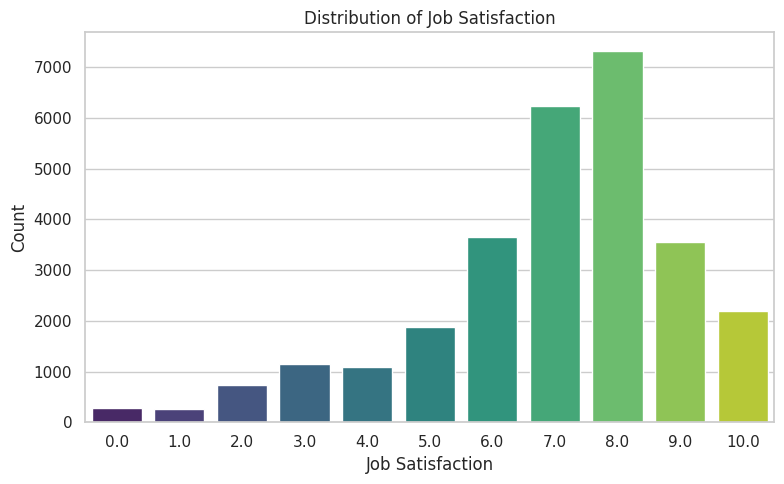

In [42]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.countplot(x='JobSat', data=df, palette='viridis')

# Customize plot
plt.title('Distribution of Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.tight_layout()

# Show plot
plt.show()

Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


/tmp/ipykernel_1038/3128533125.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RemoteWork', data=df, palette='viridis')


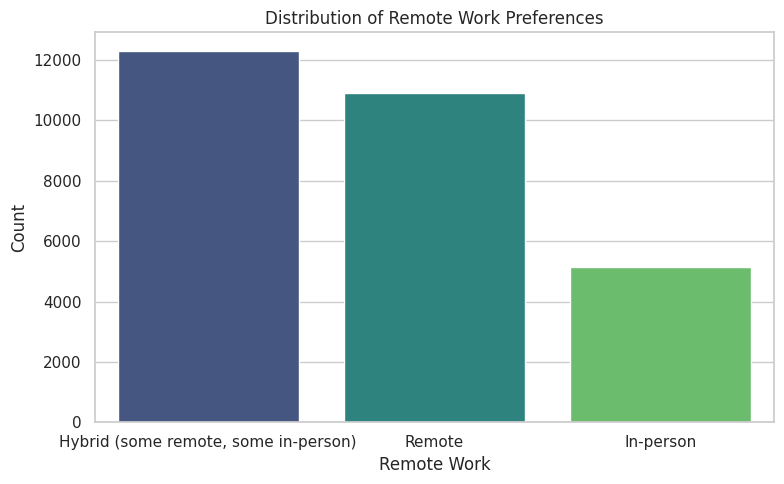

In [44]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.countplot(x='RemoteWork', data=df, palette='viridis')

# Customize plot
plt.title('Distribution of Remote Work Preferences')
plt.xlabel('Remote Work')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

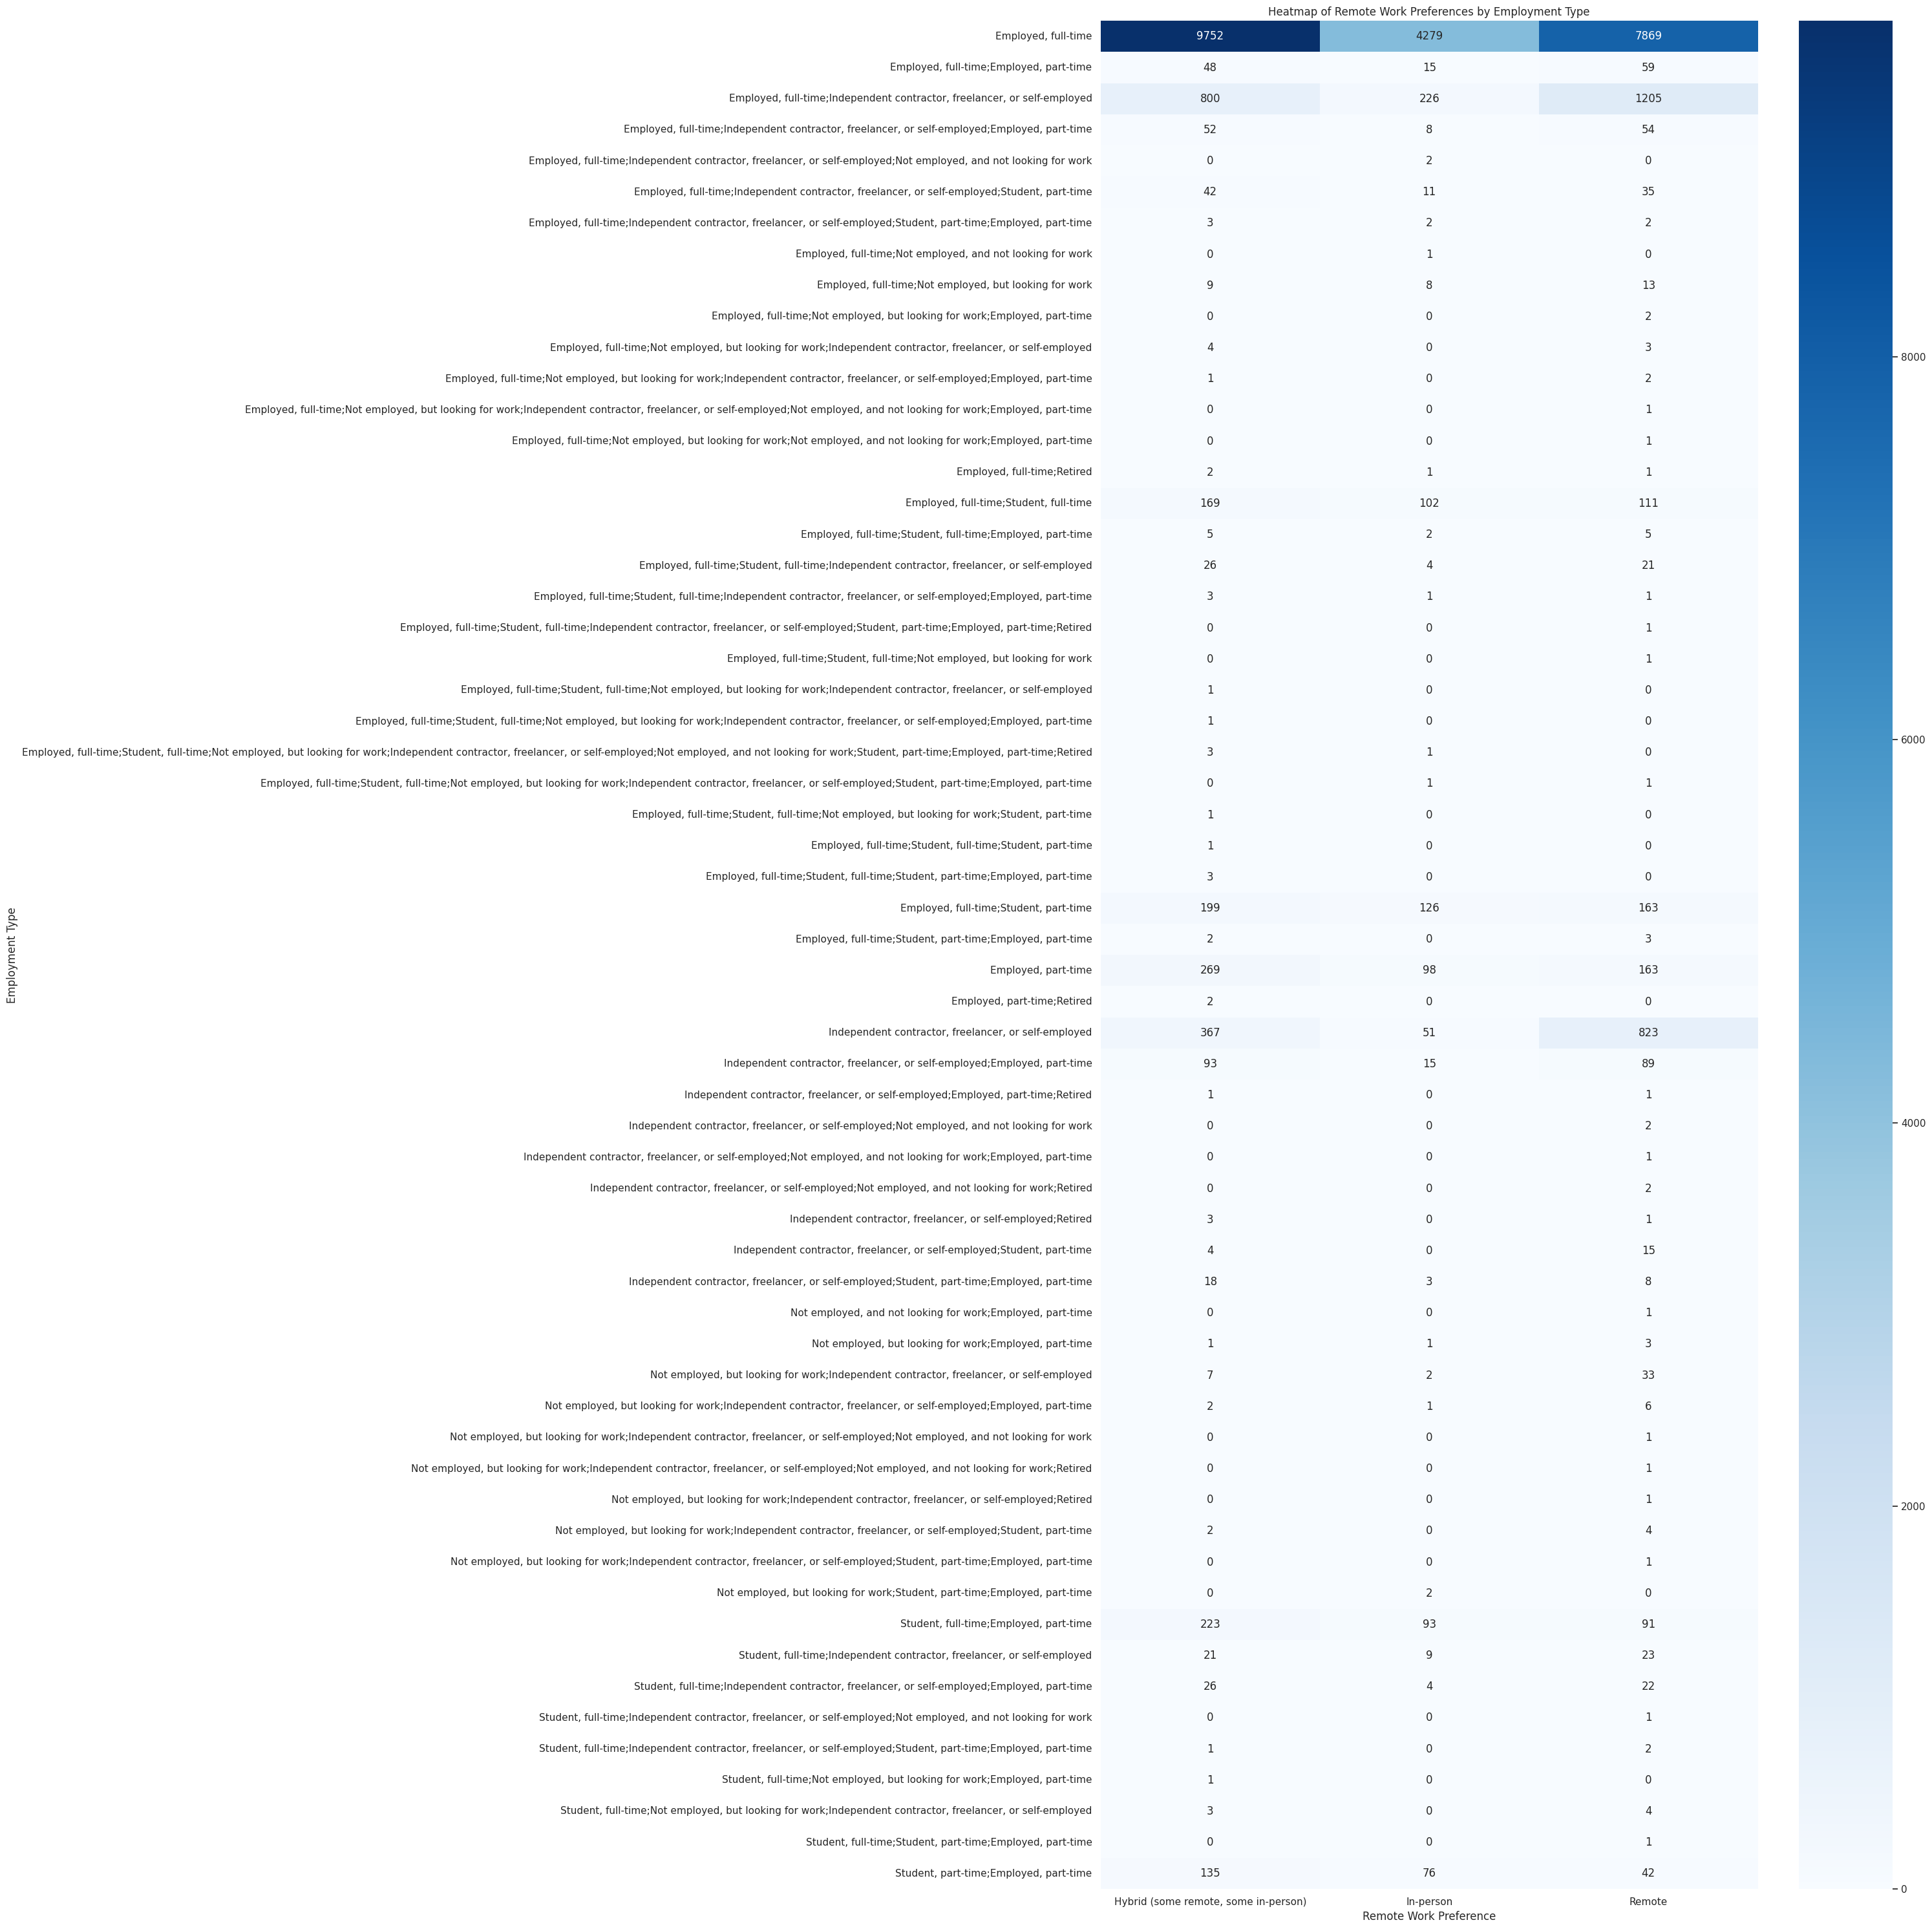

In [48]:
employment_remote_crosstab = pd.crosstab(df['Employment'], df['RemoteWork'])


plt.figure(figsize=(30, 30))
sns.heatmap(employment_remote_crosstab, annot=True, fmt='d', cmap='Blues', cbar=True)


plt.title('Heatmap of Remote Work Preferences by Employment Type')
plt.xlabel('Remote Work Preference')
plt.ylabel('Employment Type')
plt.tight_layout()

# Show the plot
plt.show()

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


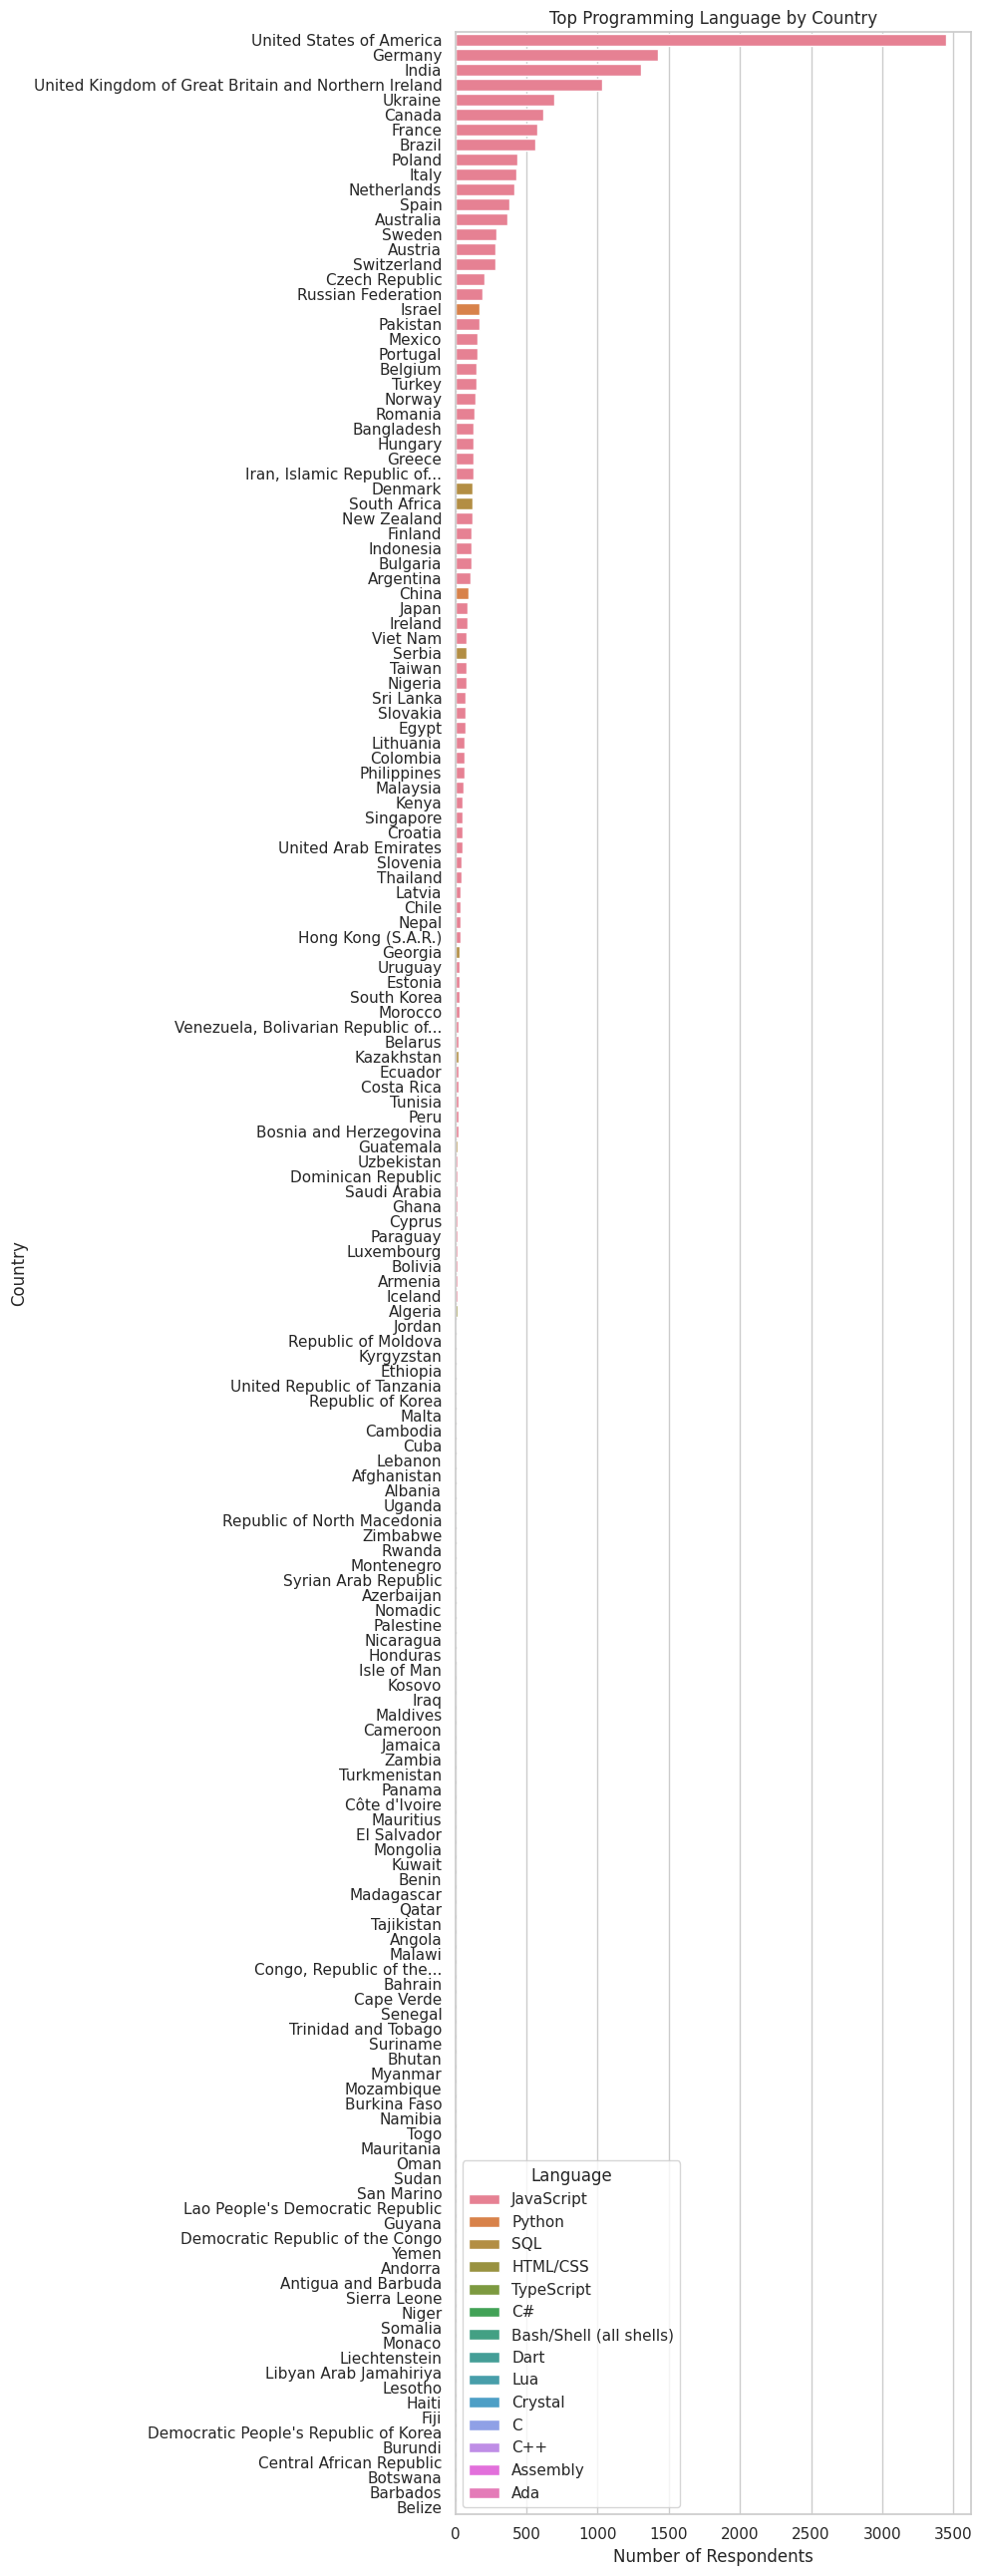

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Drop rows with missing Country or LanguageHaveWorkedWith
df = df.dropna(subset=['Country', 'LanguageHaveWorkedWith'])

# Split languages and explode to separate rows
df['Language'] = df['LanguageHaveWorkedWith'].str.split(';')
df = df.explode('Language')

# Count how often each language is used per country
lang_counts = df.groupby(['Country', 'Language']).size().reset_index(name='Count')

# Get the most used language per country
top_lang = lang_counts.sort_values('Count', ascending=False).drop_duplicates('Country')

# Plot the result
plt.figure(figsize=(10, 26))
sns.barplot(data=top_lang, y='Country', x='Count', hue='Language', dodge=False)
plt.title('Top Programming Language by Country')
plt.xlabel('Number of Respondents')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


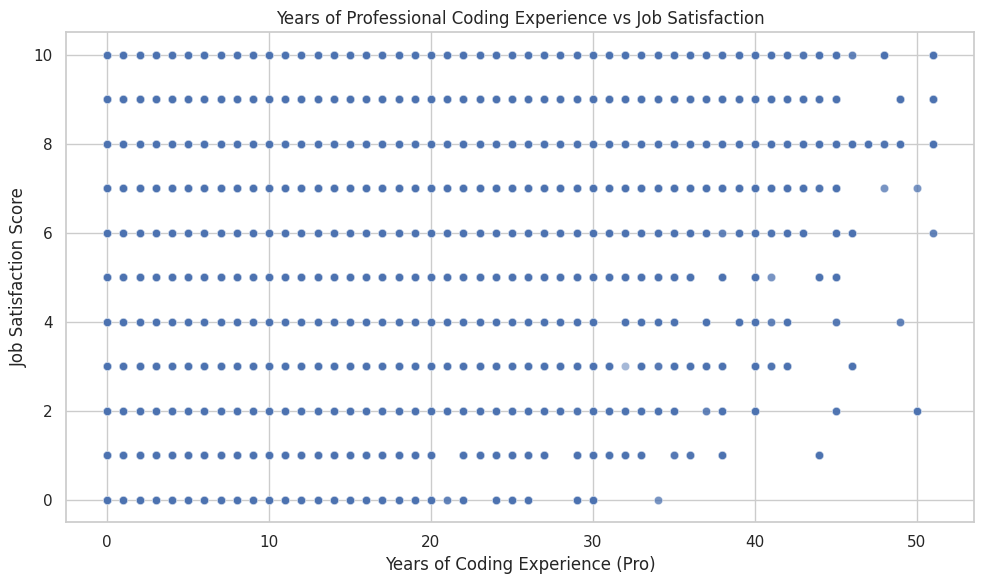

In [58]:
## Write your code here
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='YearsCodePro', y='JobSat', alpha=0.5)


plt.title('Years of Professional Coding Experience vs Job Satisfaction')
plt.xlabel('Years of Coding Experience (Pro)')
plt.ylabel('Job Satisfaction Score')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


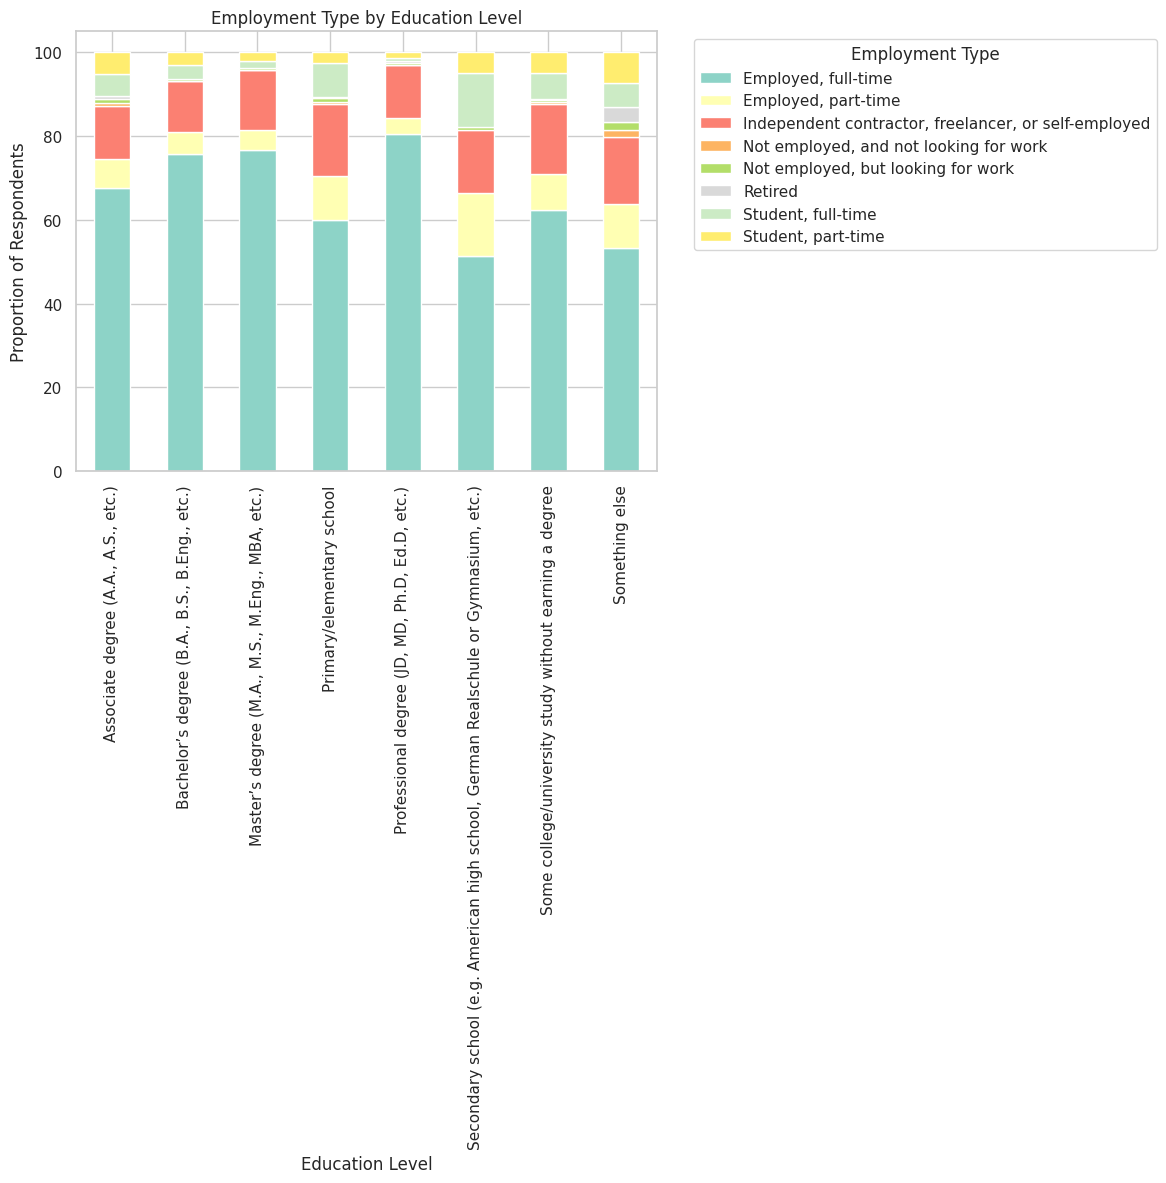

In [59]:
df = df.dropna(subset=['EdLevel', 'Employment'])

df_expanded = df.assign(EmplmtType=df['Employment'].str.split(';')).explode('EmplmtType')

emplmt_counts = df_expanded.groupby(['EdLevel', 'EmplmtType']).size().reset_index(name='Count')

emplmt_counts_sorted = emplmt_counts.sort_values(['EdLevel', 'Count'], ascending=[True, False])

top_emplmt_by_country = emplmt_counts_sorted.drop_duplicates(subset='EdLevel', keep='first')
top_emplmt_by_country.reset_index(drop=True)

edu_emp_ct = pd.crosstab(df_expanded['EdLevel'], df_expanded['EmplmtType'],normalize='index') * 100

edu_emp_ct.plot(kind='bar', stacked=True, figsize=(12, 12), colormap='Set3')

plt.title('Employment Type by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Proportion of Respondents')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

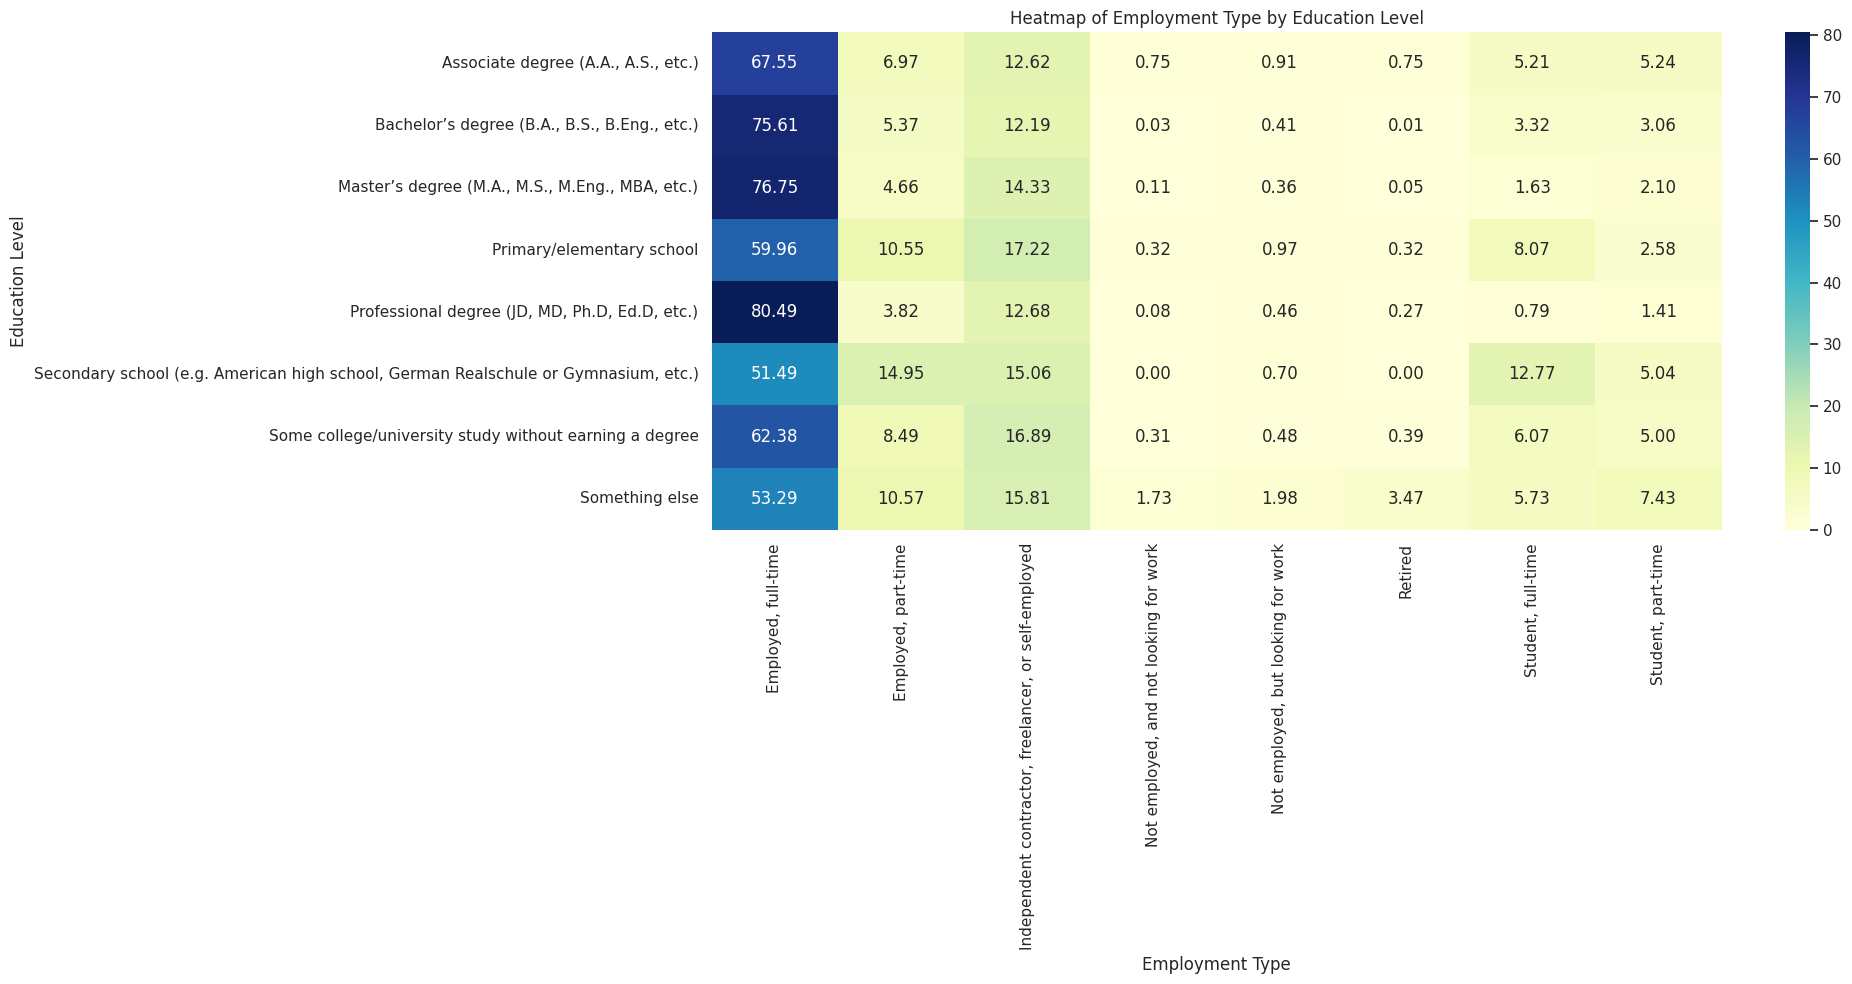

EmplmtType,"Employed, full-time","Employed, part-time","Independent contractor, freelancer, or self-employed","Not employed, and not looking for work","Not employed, but looking for work",Retired,"Student, full-time","Student, part-time"
EdLevel,,,,,,,,
"Associate degree (A.A., A.S., etc.)",67.549871,6.974265,12.623725,0.746155,0.913659,0.746155,5.207857,5.238313
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",75.610467,5.369193,12.186271,0.030341,0.409000,0.010923,3.321763,3.062042
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",76.746257,4.664104,14.330231,0.105221,0.364225,0.054634,1.632942,2.102388
Primary/elementary school,59.956943,10.548977,17.222820,0.322928,0.968784,0.322928,8.073197,2.583423
"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",80.490923,3.822552,12.682178,0.076707,0.460240,0.268474,0.792636,1.406290
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",51.490898,14.948211,15.058067,0.000000,0.698368,0.000000,12.766792,5.037665
Some college/university study without earning a degree,62.380129,8.485301,16.888068,0.306556,0.475554,0.393020,6.072158,4.999214
Something else,53.288543,10.572843,15.806223,1.732673,1.980198,3.465347,5.728430,7.425743


In [60]:
plt.figure(figsize=(20, 10))
sns.heatmap(edu_emp_ct, annot=True, cmap='YlGnBu', fmt='.2f')

plt.title('Heatmap of Employment Type by Education Level')
plt.xlabel('Employment Type')
plt.ylabel('Education Level')
plt.tight_layout()
plt.show()
edu_emp_ct

#### Step 10: Save the Cleaned and Analyzed Dataset


In [ ]:
df.to_csv('cleaned_survey_data.csv', index=False)

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
